# Cricket World Cup 2023 Analysis
Delving into the world of cricket, this project explores a comprehensive dataset capturing the essence of cricket matches. From nail-biting encounters to thrilling victories, the dataset encompasses a wealth of information including team performances and the strategic impact of toss decisions on match outcomes. Through detailed exploratory data analysis (EDA) and insightful visualizations, we unravel the dynamics of cricket matches, shedding light on key trends, patterns, and factors influencing game results. Join us on this journey as we dive into the heart of cricketing action to uncover the hidden stories behind the numbers.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [70]:
df = pd.read_csv('CWC2023.csv')
df.head(10)

,Match_No,Team_1,Team_2,Venue,Toss,Choice,Innings1_Run,Innings1_Balls,Innings1_Wickets,Innings2_Run,Innings2_Balls,Innings2_Wickets,Winner,Margin_Runs_or_Wickets
0,1,New Zealand,United Kingdom,Ahemedabad,New Zealand,Ball,282,300,9,283,218,1,New Zealand,9W
1,2,Pakistan,Netherlands,Hyderabad,Netherlands,Ball,286,294,10,205,246,10,Pakistan,81R
2,3,Bangladesh,Afghanistan,Dharamshala,Bangladesh,Ball,156,224,10,158,208,4,Bangladesh,6W
3,4,South Africa,Sri Lanka,New Delhi,SriLanka,Ball,428,300,5,326,269,10,South Africa,102R
4,5,India,Australia,Chennai,Australia,Bat,199,297,10,201,248,4,India,6W
5,6,New Zealand,Netherlands,Hyderabad,Netherlands,Ball,322,300,7,223,279,10,New Zealand,99R
6,7,United Kingdom,Bangladesh,Dharamshala,Bangladesh,Ball,364,300,9,227,290,10,United Kingdom,137R
7,8,Pakistan,Sri Lanka,Hyderabad,SriLanka,Bat,334,300,9,345,290,4,Pakistan,6W
8,9,India,Afghanistan,New Delhi,Afghanistan,Bat,272,300,8,273,210,2,India,8W
9,10,South Africa,Australia,Lucknow,Australia,Ball,311,300,7,177,345,10,South Africa,134R


In [ ]:
df.info

In [7]:
df.shape

(48, 14)

In [8]:
# Check for duplicate records
duplicates = df.duplicated().sum()

In [9]:
duplicates

0

In [71]:
df_dropna_rows = df.dropna()

# Remove columns with any null values
df_dropna_cols = df.dropna(axis=1)


In [11]:
df.shape

(48, 14)

In [46]:
# Replace 'United Kingdom' with 'England' in both 'team 1' and 'team 2' columns
columns_to_replace = ['Team_1', 'Team_2' , 'Toss' , 'Winner']
df[columns_to_replace] = df[columns_to_replace].replace('United Kingdom', 'England')

In [72]:
df.head(10)

,Match_No,Team_1,Team_2,Venue,Toss,Choice,Innings1_Run,Innings1_Balls,Innings1_Wickets,Innings2_Run,Innings2_Balls,Innings2_Wickets,Winner,Margin_Runs_or_Wickets
0,1,New Zealand,United Kingdom,Ahemedabad,New Zealand,Ball,282,300,9,283,218,1,New Zealand,9W
1,2,Pakistan,Netherlands,Hyderabad,Netherlands,Ball,286,294,10,205,246,10,Pakistan,81R
2,3,Bangladesh,Afghanistan,Dharamshala,Bangladesh,Ball,156,224,10,158,208,4,Bangladesh,6W
3,4,South Africa,Sri Lanka,New Delhi,SriLanka,Ball,428,300,5,326,269,10,South Africa,102R
4,5,India,Australia,Chennai,Australia,Bat,199,297,10,201,248,4,India,6W
5,6,New Zealand,Netherlands,Hyderabad,Netherlands,Ball,322,300,7,223,279,10,New Zealand,99R
6,7,United Kingdom,Bangladesh,Dharamshala,Bangladesh,Ball,364,300,9,227,290,10,United Kingdom,137R
7,8,Pakistan,Sri Lanka,Hyderabad,SriLanka,Bat,334,300,9,345,290,4,Pakistan,6W
8,9,India,Afghanistan,New Delhi,Afghanistan,Bat,272,300,8,273,210,2,India,8W
9,10,South Africa,Australia,Lucknow,Australia,Ball,311,300,7,177,345,10,South Africa,134R


In [48]:
# Standardize text entries - converting all text to title case to ensure consistency
data_cleaned = df.applymap(lambda x: x.title() if isinstance(x, str) else x)

In [49]:
data_cleaned

,Match_No,Team_1,Team_2,Venue,Toss,Choice,Innings1_Run,Innings1_Balls,Innings1_Wickets,Innings2_Run,Innings2_Balls,Innings2_Wickets,Winner,Margin_Runs_or_Wickets
0,1,New Zealand,England,Ahemedabad,New Zealand,Ball,282,300,9,283,218,1,New Zealand,9W
1,2,Pakistan,Netherlands,Hyderabad,Netherlands,Ball,286,294,10,205,246,10,Pakistan,81R
2,3,Bangladesh,Afghanistan,Dharamshala,Bangladesh,Ball,156,224,10,158,208,4,Bangladesh,6W
3,4,South Africa,Sri Lanka,New Delhi,Srilanka,Ball,428,300,5,326,269,10,South Africa,102R
4,5,India,Australia,Chennai,Australia,Bat,199,297,10,201,248,4,India,6W
5,6,New Zealand,Netherlands,Hyderabad,Netherlands,Ball,322,300,7,223,279,10,New Zealand,99R
6,7,England,Bangladesh,Dharamshala,Bangladesh,Ball,364,300,9,227,290,10,England,137R
7,8,Pakistan,Sri Lanka,Hyderabad,Srilanka,Bat,334,300,9,345,290,4,Pakistan,6W
8,9,India,Afghanistan,New Delhi,Afghanistan,Bat,272,300,8,273,210,2,India,8W
9,10,South Africa,Australia,Lucknow,Australia,Ball,311,300,7,177,345,10,South Africa,134R


In [50]:
# Descriptive statistics for numerical fields
descriptive_stats = data_cleaned.describe()
descriptive_stats

,Match_No,Innings1_Run,Innings1_Balls,Innings1_Wickets,Innings2_Run,Innings2_Balls,Innings2_Wickets
count,48.00,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,24.50,289.270833,291.312500,8.375000,223.833333,237.666667,9.083333
std,14.00,73.116852,20.351336,1.963768,68.372986,60.706596,16.399057
min,1.00,156.000000,200.000000,4.000000,55.000000,10.000000,1.000000
25%,12.75,240.750000,297.000000,7.000000,178.500000,208.750000,3.750000
50%,24.50,283.000000,300.000000,9.000000,225.000000,255.500000,8.000000
75%,36.25,343.500000,300.000000,10.000000,271.500000,284.000000,10.000000
max,48.00,428.000000,300.000000,10.000000,383.000000,345.000000,118.000000


In [51]:
# Distribution of matches won by each team
match_wins = data_cleaned['Winner'].value_counts()
match_wins

India           10
Australia        9
South Africa     7
New Zealand      5
Pakistan         4
Afghanistan      4
England          3
Bangladesh       2
Netherlands      2
Sri Lanka        2
Name: Winner, dtype: int64

In [52]:
# Toss decisions (bat or ball)
toss_choices = data_cleaned['Choice'].value_counts()
toss_choices

Ball    26
Bat     22
Name: Choice, dtype: int64

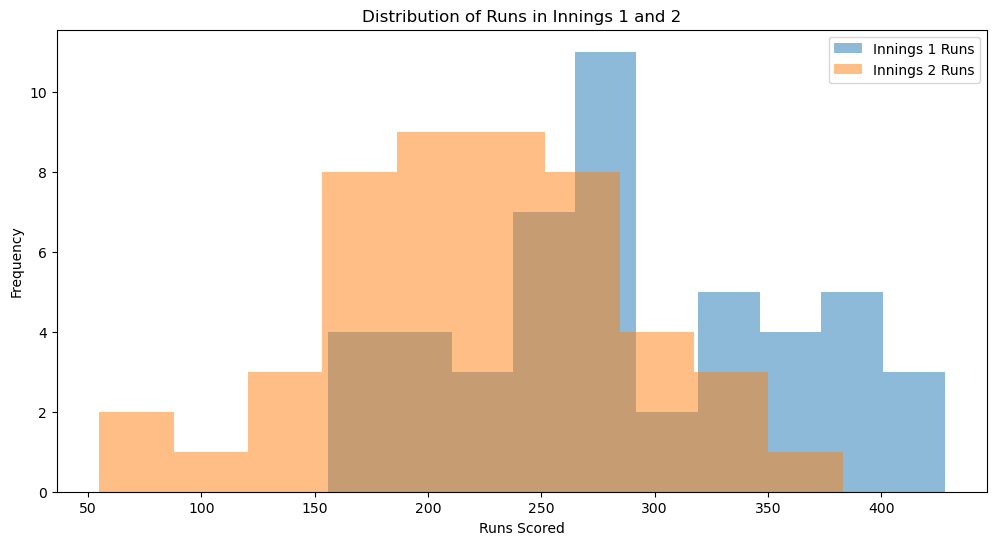

In [53]:
# Histogram for the distribution of the runs scored in the first and second innings
plt.figure(figsize=(12, 6))
plt.hist(data_cleaned['Innings1_Run'], alpha=0.5, label='Innings 1 Runs')
plt.hist(data_cleaned['Innings2_Run'], alpha=0.5, label='Innings 2 Runs')
plt.title('Distribution of Runs in Innings 1 and 2')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.legend()
plt.show()


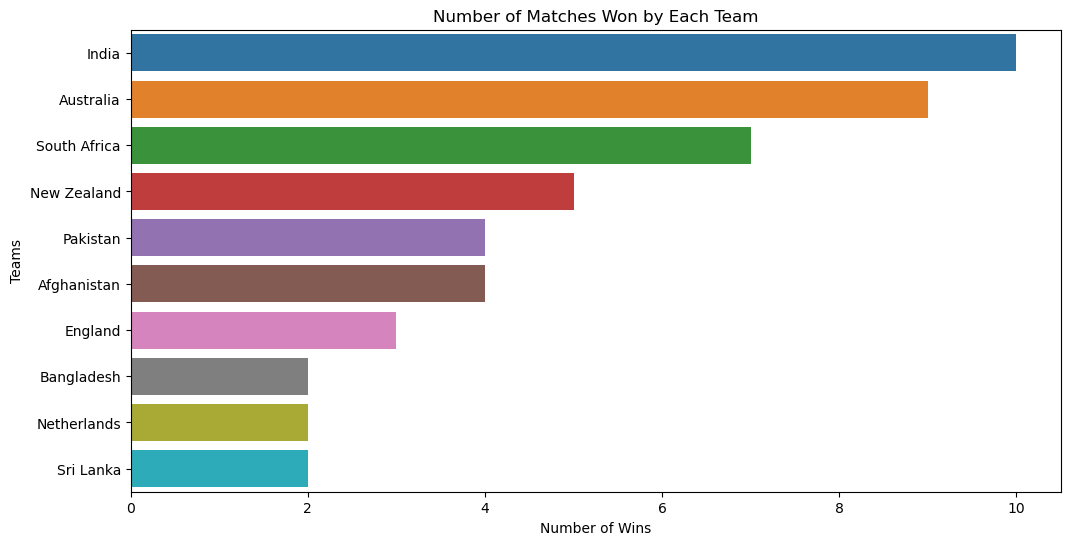

In [54]:
# Bar chart to show the number of matches won by each team
plt.figure(figsize=(12, 6))
sns.countplot(data=data_cleaned, y='Winner', order=data_cleaned['Winner'].value_counts().index)
plt.title('Number of Matches Won by Each Team')
plt.xlabel('Number of Wins')
plt.ylabel('Teams')
plt.show()

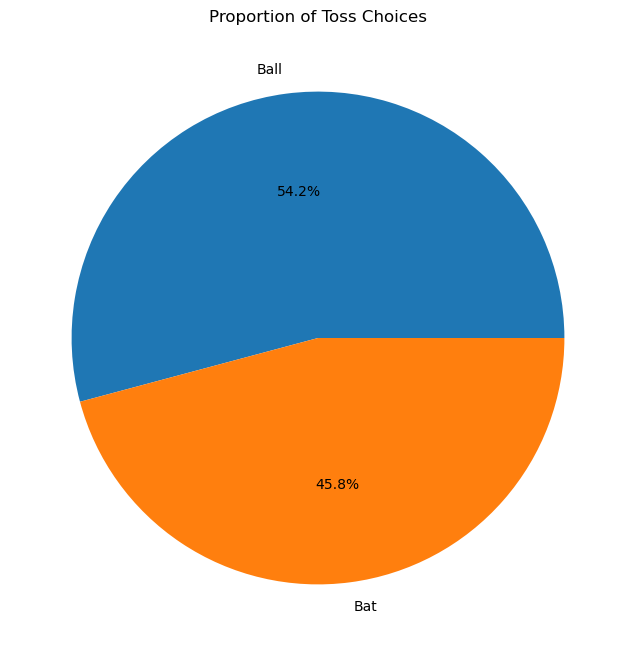

In [55]:
# Pie chart to display the proportion of toss choices
plt.figure(figsize=(8, 8))
data_cleaned['Choice'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Toss Choices')
plt.ylabel('')
plt.show()

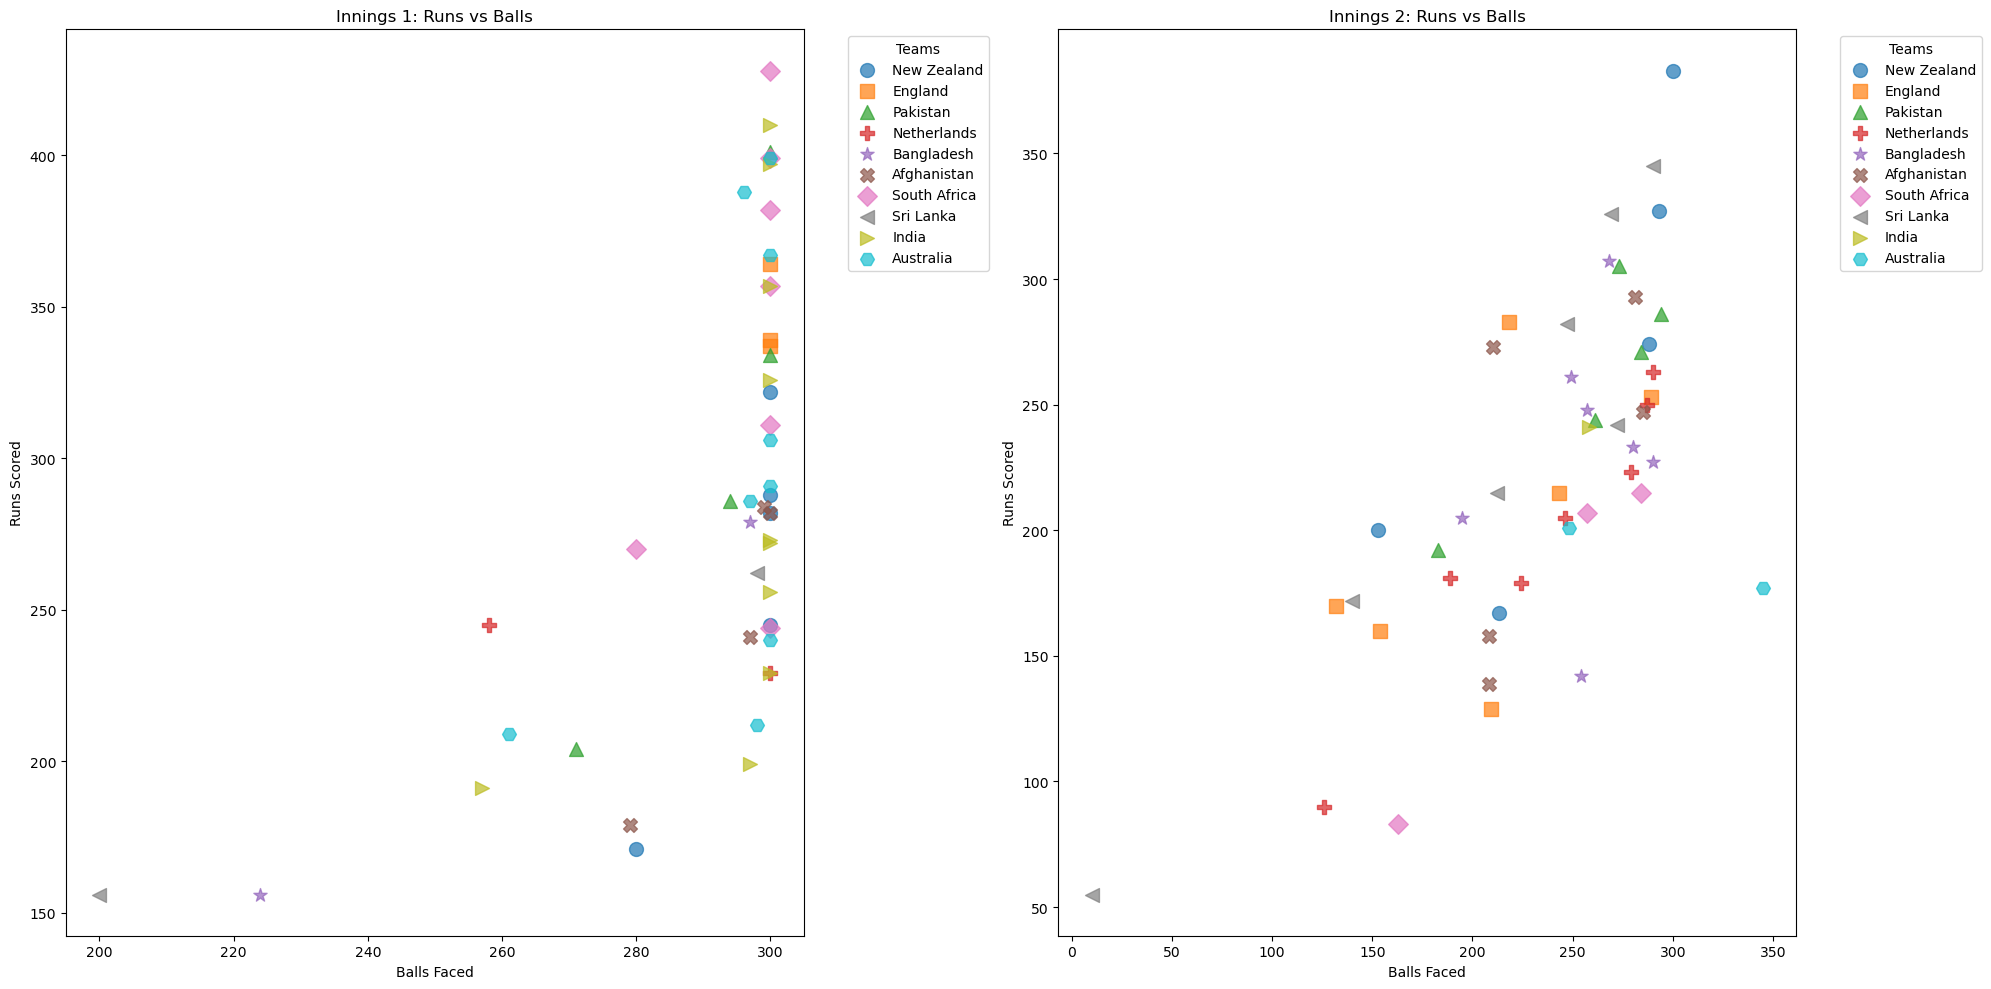

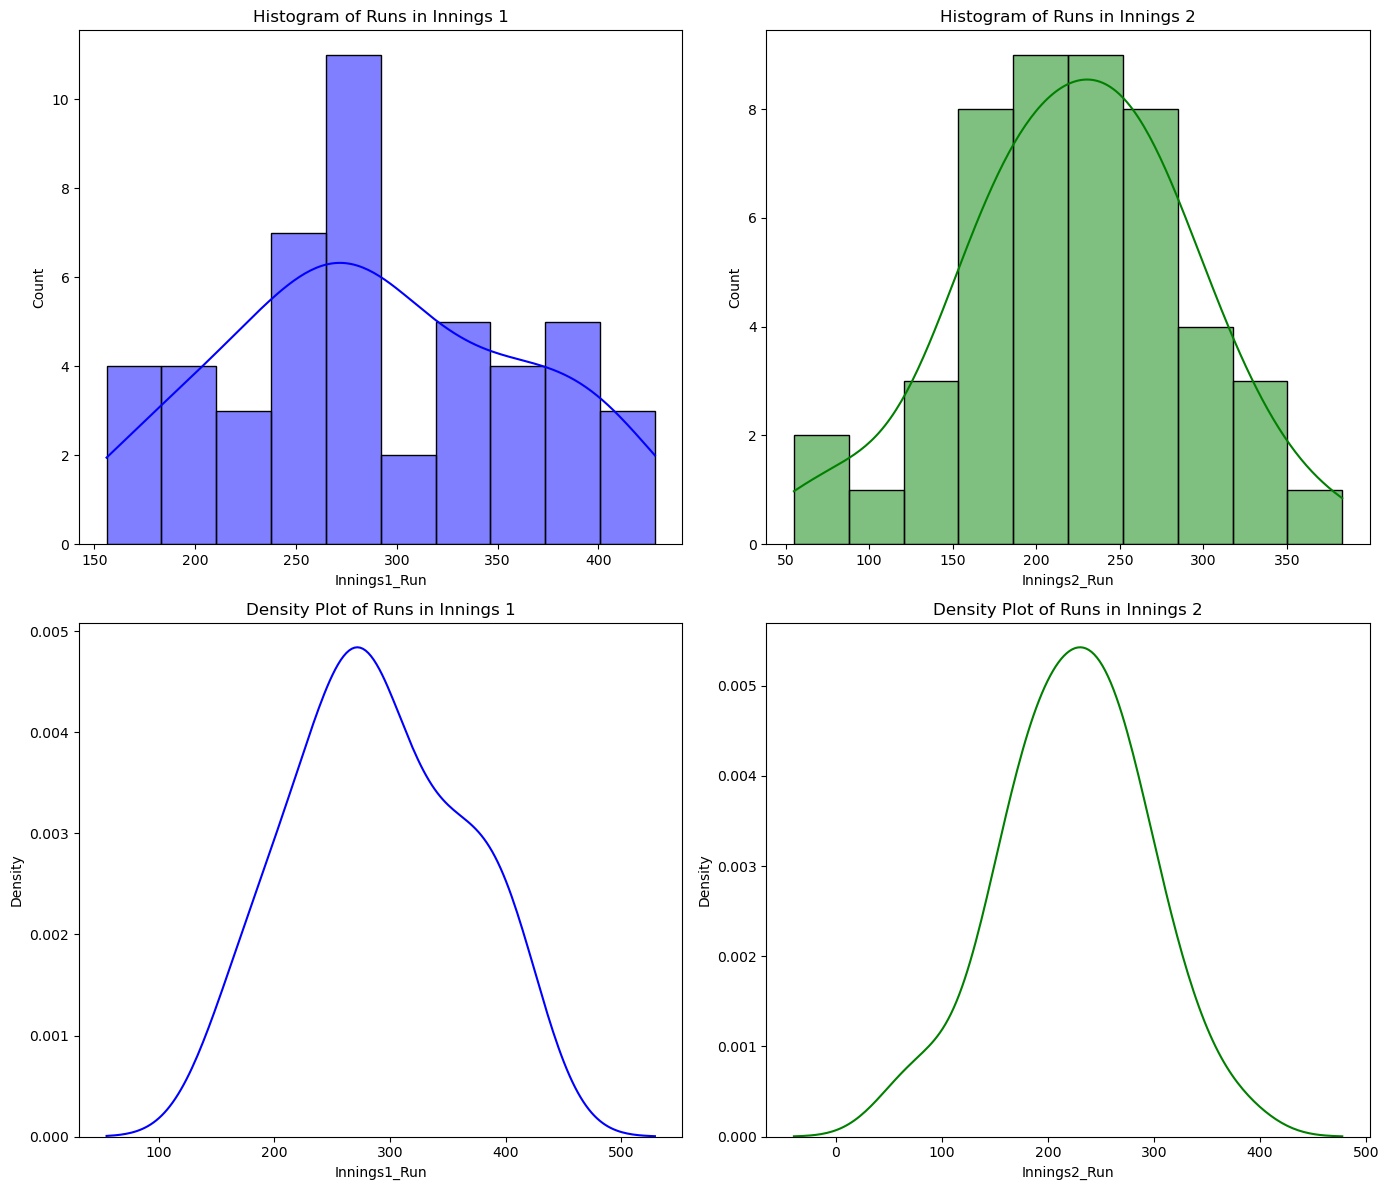

In [56]:
# Assigning specific symbols for each team
team_markers = {
    'New Zealand': 'o', 'England': 's', 'Pakistan': '^', 'Netherlands': 'P',
    'Bangladesh': '*', 'Afghanistan': 'X', 'South Africa': 'D', 'Sri Lanka': '<',
    'India': '>', 'Australia': 'H'
}

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Innings 1: Runs vs Balls with specific markers and legend for teams
for team, marker in team_markers.items():
    team_data = data_cleaned[data_cleaned['Team_1'] == team]
    ax[0].scatter(team_data['Innings1_Balls'], team_data['Innings1_Run'], label=team, marker=marker, s=100, alpha=0.7)
ax[0].set_title('Innings 1: Runs vs Balls')
ax[0].set_xlabel('Balls Faced')
ax[0].set_ylabel('Runs Scored')
ax[0].legend(title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')

# Innings 2: Runs vs Balls with specific markers and legend for teams
for team, marker in team_markers.items():
    team_data = data_cleaned[data_cleaned['Team_2'] == team]
    ax[1].scatter(team_data['Innings2_Balls'], team_data['Innings2_Run'], label=team, marker=marker, s=100, alpha=0.7)
ax[1].set_title('Innings 2: Runs vs Balls')
ax[1].set_xlabel('Balls Faced')
ax[1].set_ylabel('Runs Scored')
ax[1].legend(title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
# Creating histograms and density plots for runs in both innings
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
sns.histplot(data_cleaned['Innings1_Run'], bins=10, kde=True, color='blue', ax=axs[0, 0])
axs[0, 0].set_title('Histogram of Runs in Innings 1')

sns.histplot(data_cleaned['Innings2_Run'], bins=10, kde=True, color='green', ax=axs[0, 1])
axs[0, 1].set_title('Histogram of Runs in Innings 2')

sns.kdeplot(data_cleaned['Innings1_Run'], ax=axs[1, 0], color='blue')
axs[1, 0].set_title('Density Plot of Runs in Innings 1')

sns.kdeplot(data_cleaned['Innings2_Run'], ax=axs[1, 1], color='green')
axs[1, 1].set_title('Density Plot of Runs in Innings 2')

plt.tight_layout()
plt.show()


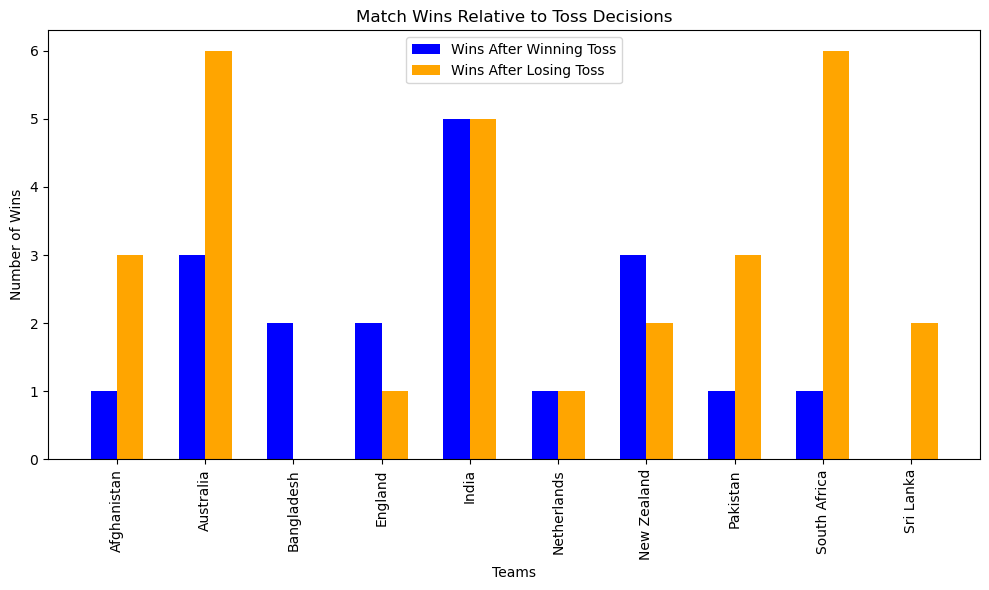

In [57]:
# Count wins after winning the toss
wins_after_winning_toss = data_cleaned[data_cleaned['Toss'] == data_cleaned['Winner']].groupby('Winner').size().reset_index(name='Wins_After_Winning_Toss')
# Count wins after losing the toss
wins_after_losing_toss = data_cleaned[data_cleaned['Toss'] != data_cleaned['Winner']].groupby('Winner').size().reset_index(name='Wins_After_Losing_Toss')

# Perform an 'outer' merge to include all teams, filling in missing values with zeros
toss_effect_full = pd.merge(wins_after_winning_toss, wins_after_losing_toss, left_on='Winner', right_on='Winner', how='outer').fillna(0)

# Correctly rename columns if necessary (in case team names have been altered during the previous steps)
toss_effect_full.rename(columns={'Winner': 'Team'}, inplace=True)

# Ensure all teams are included and correctly labeled
# List of all teams that have played, regardless of toss outcome
all_teams = set(data_cleaned['Team_1']).union(set(data_cleaned['Team_2']))

# If any teams are missing from the toss_effect_full dataframe, add them with zero wins
for team in all_teams:
    if team not in toss_effect_full['Team'].values:
        new_row = {'Team': team, 'Wins_After_Winning_Toss': 0, 'Wins_After_Losing_Toss': 0}
        toss_effect_full = toss_effect_full.append(new_row, ignore_index=True)

# Now, we plot a grouped bar chart with all teams
fig, ax = plt.subplots(figsize=(10, 6))

# Adding width to bars so they can be placed side by side
bar_width = 0.3

# Positions of bars on x-axis
ind = np.arange(len(toss_effect_full))

# Plotting
bar1 = ax.bar(ind, toss_effect_full['Wins_After_Winning_Toss'], bar_width, label='Wins After Winning Toss', color='blue')
bar2 = ax.bar(ind + bar_width, toss_effect_full['Wins_After_Losing_Toss'], bar_width, label='Wins After Losing Toss', color='orange')

# Adding labels and title
ax.set_xlabel('Teams')
ax.set_ylabel('Number of Wins')
ax.set_title('Match Wins Relative to Toss Decisions')
ax.set_xticks(ind + bar_width / 2)
ax.set_xticklabels(toss_effect_full['Team'], rotation=90)
ax.legend()

# Display the visualization
plt.tight_layout()
plt.show()

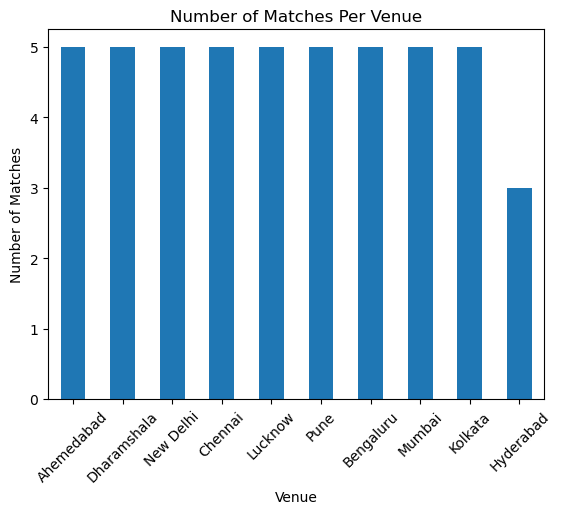

In [63]:
# Count of matches by venue
venue_counts = data_cleaned['Venue'].value_counts()

# Visualize this distribution
venue_counts.plot(kind='bar')
plt.title('Number of Matches Per Venue')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()


# Conclusion
In this project, we conducted an in-depth analysis of cricket match data, exploring various dimensions of the sport. Through exploratory data analysis (EDA) and visualization techniques, we unveiled patterns and insights into team performances, match outcomes, and strategic factors such as the impact of toss decisions. Our analysis offers a deeper understanding of the intricate dynamics of cricket matches, shedding light on the complexities and nuances that shape the sport. Overall, this project provides valuable insights for cricket enthusiasts and analysts alike, enriching our understanding of the game